# Explorative Datenanalyse: asylum_seekers_monthly.csv

Dieses Notebook dient dazu, den Datensatz **asylum_seekers_monthly.csv** besser zu verstehen.

Es zeigt:
- Aufbau und Inhalt der Daten
- Zeitliche Abdeckung
- Verteilungen
- Erste einfache Visualisierungen


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
df = pd.read_csv('../archive/asylum_seekers_monthly.csv')
df.head()

C:\Users\paulk\AppData\Local\Temp\ipykernel_5288\1933956346.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../archive/asylum_seekers_monthly.csv')


,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


## Überblick

In [4]:
df.shape

(332189, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332189 entries, 0 to 332188
Data columns (total 5 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Country / territory of asylum/residence  332189 non-null  object
 1   Origin                                   332189 non-null  object
 2   Year                                     332189 non-null  int64 
 3   Month                                    332189 non-null  object
 4   Value                                    332189 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


In [6]:
df.describe()

,Year
count,332189.000000
mean,2008.059463
std,5.243479
min,1999.000000
25%,2004.000000
50%,2008.000000
75%,2013.000000
max,2017.000000


## Variablenbeschreibung

- **Country / territory of asylum/residence**: Zielland
- **Origin**: Herkunftsland
- **Year**: Jahr
- **Month**: Monat
- **Value**: Anzahl Asylgesuche im Monat


## Zeitliche Abdeckung

In [7]:
df['Year'].min(), df['Year'].max()

(np.int64(1999), np.int64(2017))

In [8]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

## Fehlende Werte

In [9]:
df.isna().sum()

Country / territory of asylum/residence    0
Origin                                     0
Year                                       0
Month                                      0
Value                                      0
dtype: int64

In [10]:
import numpy as np
import pandas as pd

#schauen, was in Value drin ist
df['Value'].astype(str).value_counts().head(10)

# Value bereinigen
df['Value_clean'] = (
    df['Value']
    .astype(str)
    .str.strip()
    .replace({"*": np.nan, "": np.nan, "nan": np.nan})
    .str.replace(",", "", regex=False)      
    .str.replace(" ", "", regex=False)      
)

df['Value_clean'] = pd.to_numeric(df['Value_clean'], errors='coerce')


df['Value_clean'].isna().mean()

np.float64(0.0356453705571226)

## Monatliche Verteilung

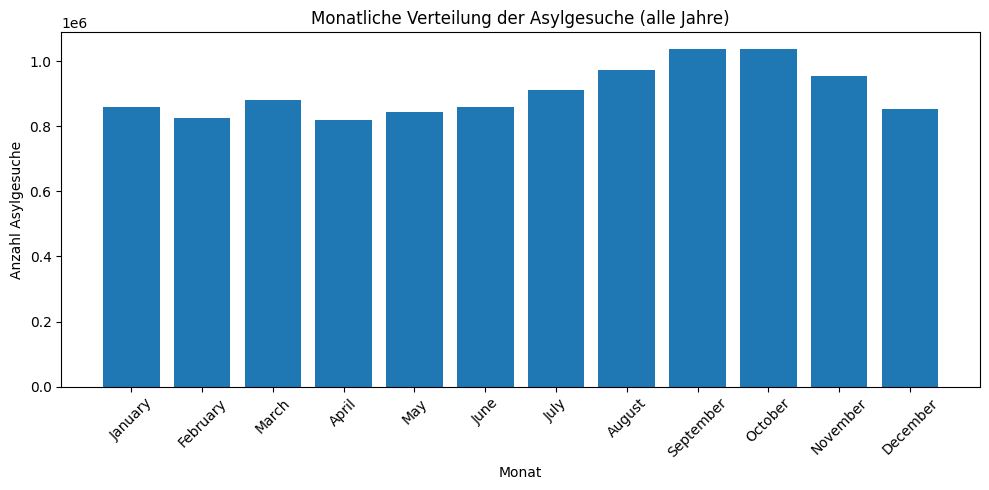

In [11]:
monthly = (
    df.groupby('Month')['Value_clean']
    .sum()
    .reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
)

plt.figure(figsize=(10, 5))
plt.bar(monthly.index, monthly.values)
plt.xlabel('Monat')
plt.ylabel('Anzahl Asylgesuche')
plt.title('Monatliche Verteilung der Asylgesuche (alle Jahre)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Jährliche Summe

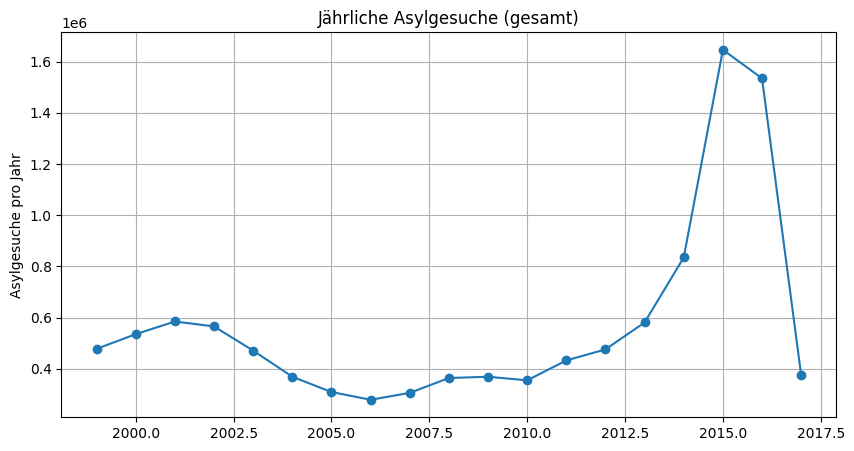

In [12]:
yearly = df.groupby('Year')['Value_clean'].sum(min_count=1)

plt.plot(yearly.index, yearly.values, marker='o')
plt.ylabel('Asylgesuche pro Jahr')
plt.title('Jährliche Asylgesuche (gesamt)')
plt.grid(True)
plt.show()

## Monatliche Verteilung Boxplot

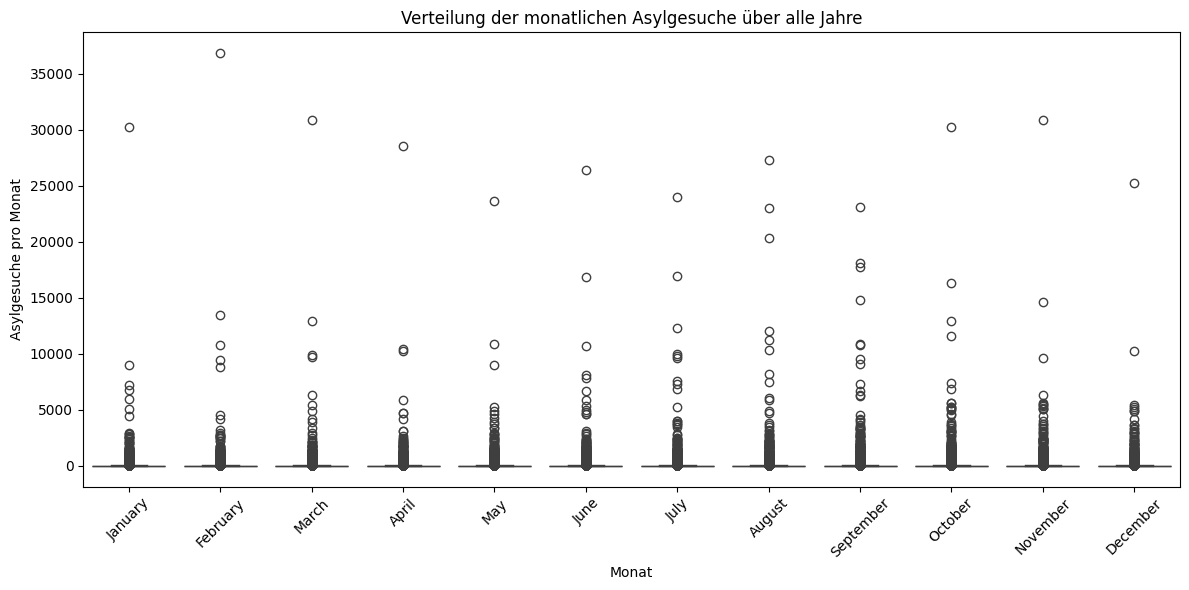

In [13]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Month',
    y='Value_clean',
    order=month_order
)

plt.xlabel('Monat')
plt.ylabel('Asylgesuche pro Monat')
plt.title('Verteilung der monatlichen Asylgesuche über alle Jahre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Monatliche Verteilung über die Jahre 

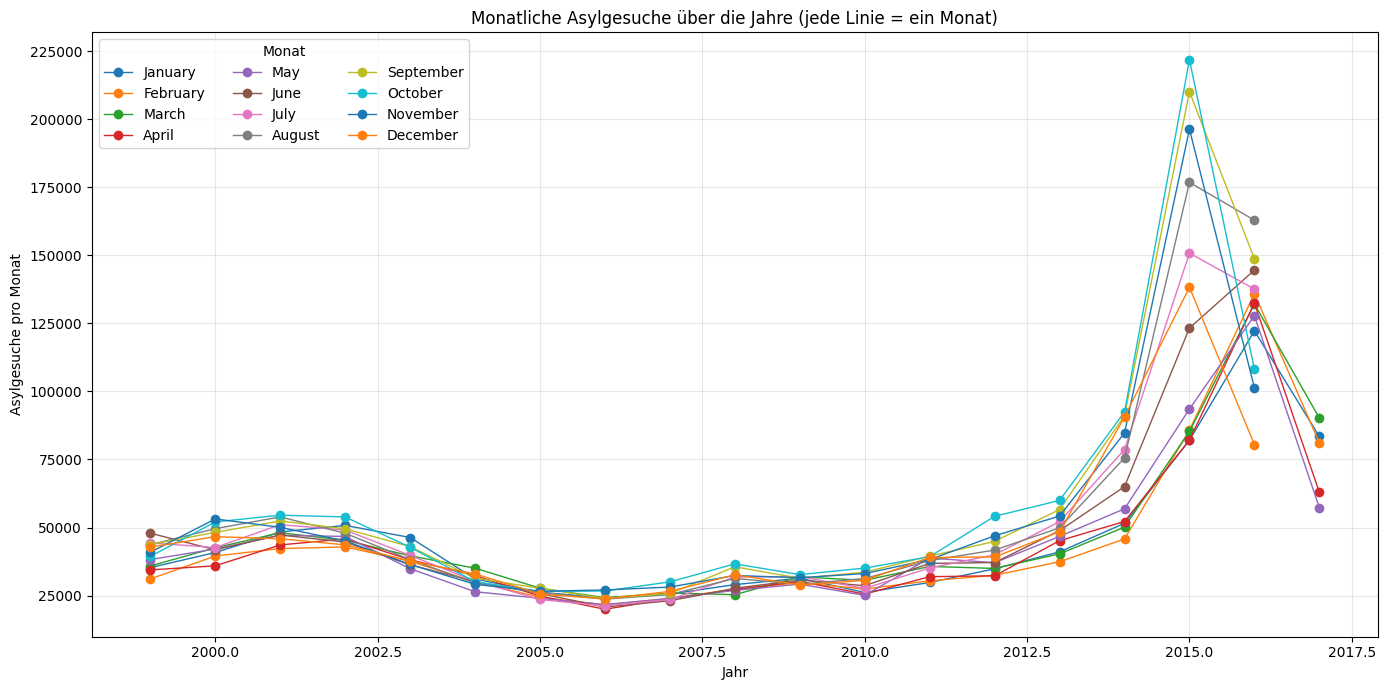

In [14]:
df['Value_clean'] = pd.to_numeric(df['Value'], errors='coerce')
df['Year'] = df['Year'].astype(int)


months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(14, 7))

for month in months:
    month_data = df[df['Month'] == month]
    yearly = month_data.groupby('Year')['Value_clean'].sum()
    plt.plot(
        yearly.index,
        yearly.values,
        label=month,
        marker='o',
        linewidth=1
    )

plt.xlabel('Jahr')
plt.ylabel('Asylgesuche pro Monat')
plt.title('Monatliche Asylgesuche über die Jahre (jede Linie = ein Monat)')
plt.legend(title='Monat', ncol=3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Top Herkunftsländer

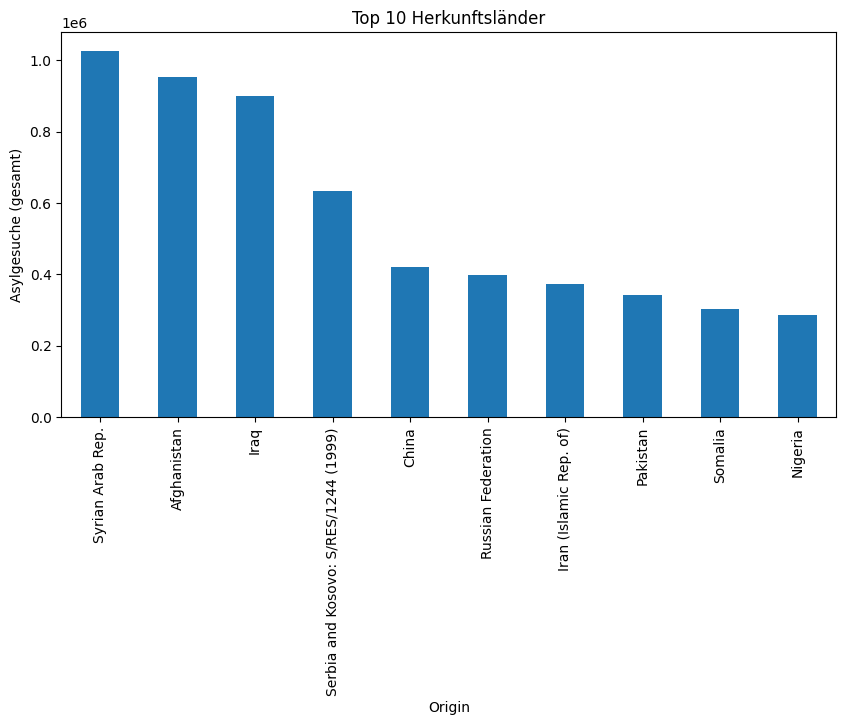

In [15]:
top_origins = df.groupby('Origin')['Value_clean'].sum().sort_values(ascending=False).head(10)
top_origins.plot(kind='bar')
plt.ylabel('Asylgesuche (gesamt)')
plt.title('Top 10 Herkunftsländer')
plt.show()

## Fazit

Der Datensatz eignet sich gut für Zeitreihenanalysen.
Die monatliche Auflösung erlaubt detaillierte Einblicke in kurzfristige Entwicklungen.
Für Vergleiche zwischen Ländern sind Aggregationen sinnvoll.